### Question - 6 Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_excel("pokemon.xlsx")

In [65]:
df

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,weakness,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,"Fire, Ice, Flying, Psychic","Ivysaur, Venusaur",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"Fire, Ice, Flying, Psychic",Venusaur,Bulbasaur
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,"Fire, Ice, Flying, Psychic",NaN,"Bulbasaur, Ivysaur"
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,"Water, Ground, Rock","Charmeleon, Charizard",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,"Water, Ground, Rock",Charizard,Charmander
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"Ice, Dragon, Fairy","Dragonair, Dragonite",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,"Ice, Dragon, Fairy",Dragonite,Dratini
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon, Flying",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,"Ice, Rock, Dragon, Fairy",NaN,"Dratini, Dragonair"
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,"Bug, Ghost, Dark",NaN,NaN


### 1 Get all pokemon whose spawn rate is less then 5% (ie. <0.05)

In [66]:


filtered_data_spawn_rate = pd.DataFrame(df.loc[df["spawn_chance"]<0.05,["name", "spawn_chance"]])


In [67]:
filtered_data_spawn_rate

,name,spawn_chance
1,Ivysaur,0.0420
2,Venusaur,0.0170
4,Charmeleon,0.0120
5,Charizard,0.0031
7,Wartortle,0.0340
...,...,...
145,Moltres,0.0000
147,Dragonair,0.0200
148,Dragonite,0.0011
149,Mewtwo,0.0000


In [68]:
pokemon_names = filtered_data_spawn_rate['name'].tolist()
print(f"The Pokémon with less than 5% spawn rate are:{len(pokemon_names)}")
for name in pokemon_names:
    print(name)

The Pokémon with less than 5% spawn rate are:65
Ivysaur
Venusaur
Charmeleon
Charizard
Wartortle
Blastoise
Butterfree
Raichu
Sandslash
Nidoqueen
Nidoking
Clefable
Ninetales
Wigglytuff
Vileplume
Dugtrio
Persian
Primeape
Arcanine
Poliwrath
Kadabra
Alakazam
Machoke
Machamp
Victreebel
Golem
Rapidash
Slowbro
Magneton
Farfetch'd
Dewgong
Muk
Cloyster
Gengar
Electrode
Exeggutor
Marowak
Hitmonlee
Hitmonchan
Lickitung
Weezing
Rhydon
Chansey
Kangaskhan
Seadra
Starmie
Mr. Mime
Gyarados
Lapras
Ditto
Vaporeon
Jolteon
Flareon
Porygon
Omastar
Kabutops
Aerodactyl
Snorlax
Articuno
Zapdos
Moltres
Dragonair
Dragonite
Mewtwo
Mew


Text(0.5, 1.0, 'Spawn rate distribution')

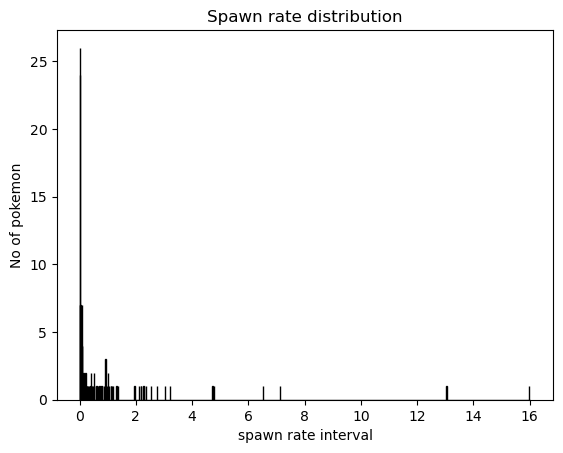

In [69]:
#Best visualization for above will be hist plot to divide the pokemon numbers spawn rates

num_bins = int((max(df["spawn_chance"]) - min(df["spawn_chance"]))/.01) + 1
bin_width = 0.05

plt.hist(df["spawn_chance"], bins = num_bins, range=(min(df['spawn_chance']), max(df['spawn_chance']) + bin_width), edgecolor='black')

plt.xlabel("spawn rate interval")
plt.ylabel("No of pokemon")
plt.title("Spawn rate distribution")

### 2 Get all pokemon having less then 4 weakness 

In [70]:
#Spliting the weakness column

df["num_weakness"] = df["weakness"].apply(lambda x: len(x.split(',')))

In [71]:
df

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,weakness,next_evolution,prev_evolution,num_weakness
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,"Fire, Ice, Flying, Psychic","Ivysaur, Venusaur",NaN,4
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"Fire, Ice, Flying, Psychic",Venusaur,Bulbasaur,4
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,"Fire, Ice, Flying, Psychic",NaN,"Bulbasaur, Ivysaur",4
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,"Water, Ground, Rock","Charmeleon, Charizard",NaN,3
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,"Water, Ground, Rock",Charizard,Charmander,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"Ice, Dragon, Fairy","Dragonair, Dragonite",NaN,3
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,"Ice, Dragon, Fairy",Dragonite,Dratini,3
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon, Flying",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,"Ice, Rock, Dragon, Fairy",NaN,"Dratini, Dragonair",4
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,"Bug, Ghost, Dark",NaN,NaN,3


Text(0.5, 1.0, 'Distribution of numbers of pokemon weaknesses')

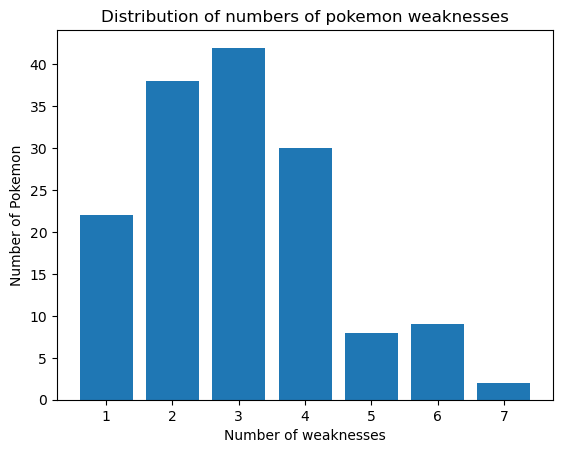

In [72]:
#best plot to visualize --> bar plot

weakness_counts = df['num_weakness'].value_counts().sort_index()

# Create the bar plot
plt.bar(weakness_counts.index, weakness_counts.values)
plt.xlabel("Number of weaknesses")
plt.ylabel("Number of Pokemon")
plt.title("Distribution of numbers of pokemon weaknesses")

In [73]:
#Pokemon list for less than 4 weakness
pokemon_names = df[df['num_weakness'] < 4]['name'].tolist()
print(f"The Pokémon with less than 4 weaknesses are:{len(pokemon_names)}")
for i in pokemon_names:
    print(i)

The Pokémon with less than 4 weaknesses are:102
Charmander
Charmeleon
Charizard
Squirtle
Wartortle
Blastoise
Caterpie
Metapod
Pidgey
Pidgeotto
Pidgeot
Rattata
Raticate
Spearow
Fearow
Ekans
Arbok
Pikachu
Raichu
Sandshrew
Sandslash
Nidoran ♀ (Female)
Nidorina
Nidoran ♂ (Male)
Nidorino
Clefairy
Clefable
Vulpix
Ninetales
Jigglypuff
Wigglytuff
Diglett
Dugtrio
Meowth
Persian
Psyduck
Golduck
Mankey
Primeape
Growlithe
Arcanine
Poliwag
Poliwhirl
Abra
Kadabra
Alakazam
Machop
Machoke
Machamp
Tentacool
Tentacruel
Ponyta
Rapidash
Magnemite
Magneton
Farfetch'd
Doduo
Dodrio
Seel
Grimer
Muk
Shellder
Drowzee
Hypno
Krabby
Kingler
Voltorb
Electrode
Cubone
Marowak
Hitmonlee
Hitmonchan
Lickitung
Koffing
Weezing
Chansey
Kangaskhan
Horsea
Seadra
Goldeen
Seaking
Staryu
Mr. Mime
Electabuzz
Magmar
Pinsir
Tauros
Magikarp
Gyarados
Ditto
Eevee
Vaporeon
Jolteon
Flareon
Porygon
Snorlax
Zapdos
Moltres
Dratini
Dragonair
Mewtwo
Mew


### 3. Get all pokemon that has no multiplier at all

In [74]:
#Spliting the next evolution column

df['next_evolution'] = df['next_evolution'].fillna('')

# Split the values by commas and calculate the number of multipliers for each Pokémon
df['num_multipliers'] = df['next_evolution'].apply(lambda x: len(x.split(',')) if x else 0)

Text(0.5, 1.0, 'Pokemon Multipliers distribution')

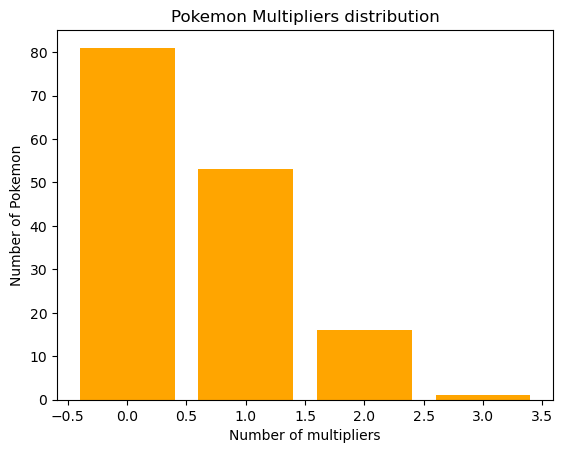

In [75]:
#best plot to visualize --> bar plot

multipliers_counts = df['num_multipliers'].value_counts().sort_index()

# Create the bar plot
plt.bar(multipliers_counts.index, multipliers_counts.values, color = "orange")
plt.xlabel("Number of multipliers")
plt.ylabel("Number of Pokemon")
plt.title("Pokemon Multipliers distribution")

In [76]:
#Pokemon list for less than no multiplier
pokemon_names = df[df['num_multipliers'] == 0]['name'].tolist()
print(f"The Pokémon with no multiplier are:{len(pokemon_names)}")
for i in pokemon_names:
    print(i)

The Pokémon with no multiplier are:81
Venusaur
Charizard
Blastoise
Butterfree
Beedrill
Pidgeot
Raticate
Fearow
Arbok
Raichu
Sandslash
Nidoqueen
Nidoking
Clefable
Ninetales
Wigglytuff
Golbat
Vileplume
Parasect
Venomoth
Dugtrio
Persian
Golduck
Primeape
Arcanine
Poliwrath
Alakazam
Machamp
Victreebel
Tentacruel
Golem
Rapidash
Slowbro
Magneton
Farfetch'd
Dodrio
Dewgong
Muk
Cloyster
Gengar
Onix
Hypno
Kingler
Electrode
Exeggutor
Marowak
Hitmonlee
Hitmonchan
Lickitung
Weezing
Rhydon
Chansey
Tangela
Kangaskhan
Seadra
Seaking
Starmie
Mr. Mime
Scyther
Jynx
Electabuzz
Magmar
Pinsir
Tauros
Gyarados
Lapras
Ditto
Vaporeon
Jolteon
Flareon
Porygon
Omastar
Kabutops
Aerodactyl
Snorlax
Articuno
Zapdos
Moltres
Dragonite
Mewtwo
Mew


In [77]:
df

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,weakness,next_evolution,prev_evolution,num_weakness,num_multipliers
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,"Fire, Ice, Flying, Psychic","Ivysaur, Venusaur",NaN,4,2
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"Fire, Ice, Flying, Psychic",Venusaur,Bulbasaur,4,1
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,"Fire, Ice, Flying, Psychic",,"Bulbasaur, Ivysaur",4,0
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,"Water, Ground, Rock","Charmeleon, Charizard",NaN,3,2
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,"Water, Ground, Rock",Charizard,Charmander,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"Ice, Dragon, Fairy","Dragonair, Dragonite",NaN,3,2
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,"Ice, Dragon, Fairy",Dragonite,Dratini,3,1
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon, Flying",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,"Ice, Rock, Dragon, Fairy",,"Dratini, Dragonair",4,0
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,"Bug, Ghost, Dark",,NaN,3,0


### 4. Get all pokemons who does not have more than 2 evolutions

In [91]:
#Pokemon list for more than 2 evoulutions
pokemon_names = df[df['num_multipliers'] <= 2]['name'].tolist()
print(f"The Pokémon with more then 2 evolutions are:{len(pokemon_names)}")
for i in pokemon_names:
    print(i)

The Pokémon with more then 2 evolutions are:150
Bulbasaur
Ivysaur
Venusaur
Charmander
Charmeleon
Charizard
Squirtle
Wartortle
Blastoise
Caterpie
Metapod
Butterfree
Weedle
Kakuna
Beedrill
Pidgey
Pidgeotto
Pidgeot
Rattata
Raticate
Spearow
Fearow
Ekans
Arbok
Pikachu
Raichu
Sandshrew
Sandslash
Nidoran ♀ (Female)
Nidorina
Nidoqueen
Nidoran ♂ (Male)
Nidorino
Nidoking
Clefairy
Clefable
Vulpix
Ninetales
Jigglypuff
Wigglytuff
Zubat
Golbat
Oddish
Gloom
Vileplume
Paras
Parasect
Venonat
Venomoth
Diglett
Dugtrio
Meowth
Persian
Psyduck
Golduck
Mankey
Primeape
Growlithe
Arcanine
Poliwag
Poliwhirl
Poliwrath
Abra
Kadabra
Alakazam
Machop
Machoke
Machamp
Bellsprout
Weepinbell
Victreebel
Tentacool
Tentacruel
Geodude
Graveler
Golem
Ponyta
Rapidash
Slowpoke
Slowbro
Magnemite
Magneton
Farfetch'd
Doduo
Dodrio
Seel
Dewgong
Grimer
Muk
Shellder
Cloyster
Gastly
Haunter
Gengar
Onix
Drowzee
Hypno
Krabby
Kingler
Voltorb
Electrode
Exeggcute
Exeggutor
Cubone
Marowak
Hitmonlee
Hitmonchan
Lickitung
Koffing
Weezing
Rhyho

### 5. Get pokemon whose spawn time is less then 300 seconds

In [82]:
df["spawn_time"].dtype

dtype('<M8[ns]')

In [81]:
#converting into dattime

df['spawn_time'] = df['spawn_time'].fillna('00:00')

# Convert the "spawn time" column to datetime format
df['spawn_time'] = pd.to_datetime(df['spawn_time'], format='%M:%S')

In [92]:
#Pokemon list for less than 5 min
df_less_than_5min = df[df['spawn_time'] < pd.to_datetime('00:05:00', format='%H:%M:%S')]

# Get the list of Pokémon names with spawn time less than 5 minutes
pokemon_list = df_less_than_5min['name'].tolist()
print(f"THe pokemon having less then 300 seconds spawn time are: {len(pokemon_list)}")
for i in pokemon_list:
    print(i)


THe pokemon having less then 300 seconds spawn time are: 81
Squirtle
Blastoise
Metapod
Weedle
Kakuna
Beedrill
Pidgey
Pidgeotto
Pidgeot
Rattata
Raticate
Fearow
Arbok
Pikachu
Sandshrew
Nidoran ♀ (Female)
Nidoran ♂ (Male)
Clefairy
Clefable
Ninetales
Golbat
Oddish
Paras
Parasect
Venonat
Diglett
Meowth
Persian
Psyduck
Growlithe
Arcanine
Poliwag
Poliwrath
Abra
Machop
Machamp
Bellsprout
Tentacool
Graveler
Ponyta
Rapidash
Slowbro
Magnemite
Farfetch'd
Dodrio
Muk
Cloyster
Gastly
Haunter
Gengar
Onix
Drowzee
Hypno
Krabby
Kingler
Voltorb
Electrode
Cubone
Marowak
Hitmonlee
Lickitung
Rhyhorn
Chansey
Kangaskhan
Horsea
Seadra
Goldeen
Mr. Mime
Electabuzz
Pinsir
Tauros
Gyarados
Ditto
Jolteon
Porygon
Kabuto
Articuno
Zapdos
Moltres
Mewtwo
Mew


### 6. Get all Pokemons who have more than two types of capibility

In [94]:
#splitting ability into nums_of capibility

df["num_capibility"] = df["type"].apply(lambda x: len(x.split(',')))

Text(0.5, 1.0, 'Pokemon Ability distribution')

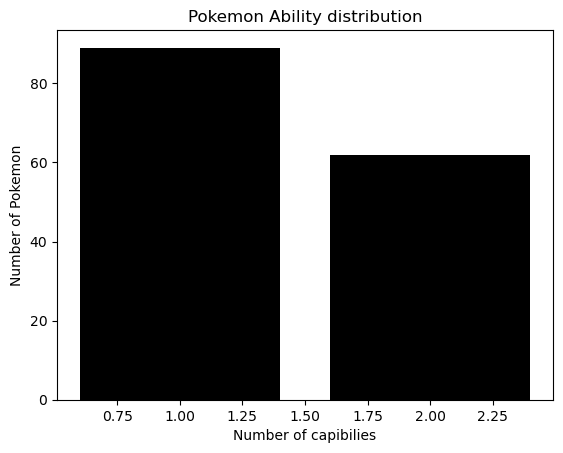

In [95]:
#best plot -->> bar plot

ability_counts = df['num_capibility'].value_counts().sort_index()

# Create the bar plot
plt.bar(ability_counts.index, ability_counts.values, color = "black")
plt.xlabel("Number of capibilies")
plt.ylabel("Number of Pokemon")
plt.title("Pokemon Ability distribution")

In [98]:
#Pokemon list for more than 2 tyes of capiblity
pokemon_names = df[df['num_capibility'] > 2]['name'].tolist()
print(f"The Pokémon with more then 2 abilities are:{len(pokemon_names)}")
for i in pokemon_names:
    print(i)

The Pokémon with more then 2 abilities are:0
